In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [4]:
df = pd.read_csv('/content/datasaurus.csv')

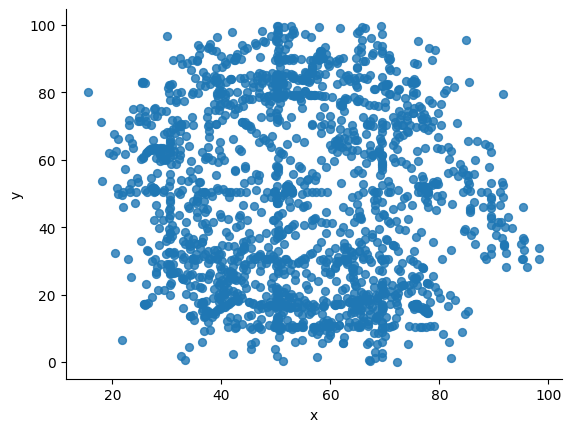

In [ ]:
# @title x vs y

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='x', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
X = df[['x', 'y']]
y = df['dataset']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Baseline Model for J48 (Decision Tree - C4.5) with default parameters
baseline_j48 = DecisionTreeClassifier(random_state=42)  # Default parameters are similar to J48
baseline_j48.fit(X_train, y_train)

# Evaluate the baseline J48 model
baseline_j48_predictions = baseline_j48.predict(X_test)
print("Baseline J48 Classification Report:")
print(classification_report(y_test, baseline_j48_predictions))

# Random Forest Classifier with baseline parameters
# Initialize and train a Random Forest classifier with default parameters
baseline_forest = RandomForestClassifier(random_state=42)  # Default parameters
baseline_forest.fit(X_train, y_train)

# Evaluate the baseline Random Forest model
baseline_forest_predictions = baseline_forest.predict(X_test)
print("\nBaseline Random Forest Classification Report:")
print(classification_report(y_test, baseline_forest_predictions))

Baseline J48 Classification Report:
              precision    recall  f1-score   support

        away       0.21      0.21      0.21        28
    bullseye       0.42      0.35      0.38        37
      circle       0.36      0.54      0.43        28
        dino       0.18      0.16      0.17        25
        dots       0.54      0.65      0.59        20
     h_lines       0.79      0.75      0.77        36
  high_lines       0.29      0.29      0.29        28
  slant_down       0.22      0.25      0.24        24
    slant_up       0.23      0.17      0.20        29
        star       0.66      0.70      0.68        27
     v_lines       0.60      0.45      0.52        33
  wide_lines       0.23      0.23      0.23        30
     x_shape       0.32      0.36      0.34        25

    accuracy                           0.40       370
   macro avg       0.39      0.39      0.39       370
weighted avg       0.40      0.40      0.40       370


Baseline Random Forest Classification Repo

In [30]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Optimize Model Parameters for J48 (Decision Tree - C4.5) using Randomized Search
param_dist_j48 = {
    'criterion': [ 'entropy'],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'min_samples_split': [1, 2 ,3 ,4],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2', None]
}
random_search_j48 = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dist_j48, n_iter=100, cv=5, random_state=42)
random_search_j48.fit(X_train, y_train)

# Get the best parameters and retrain the J48 model
best_j48_params = random_search_j48.best_params_
best_j48 = DecisionTreeClassifier(random_state=42, **best_j48_params)
best_j48.fit(X_train, y_train)

# Evaluate the optimized J48 model
best_j48_predictions = best_j48.predict(X_test)
print("Optimized J48 Classification Report:")
print(classification_report(y_test, best_j48_predictions))

# Step 3: Optimize Random Forest Model Parameters using Randomized Search
param_dist_forest = {
    'criterion': [ 'gini'],
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
random_search_forest = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_forest, n_iter=100, cv=5, random_state=42)
random_search_forest.fit(X_train, y_train)

# Get the best parameters and retrain the Random Forest model
best_forest_params = random_search_forest.best_params_
best_forest = RandomForestClassifier(random_state=42, **best_forest_params)
best_forest.fit(X_train, y_train)

# Evaluate the optimized Random Forest model
best_forest_predictions = best_forest.predict(X_test)
print("\nOptimized Random Forest Classification Report:")
print(classification_report(y_test, best_forest_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
130 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

Optimized J48 Classification Report:
              precision    recall  f1-score   support

        away       0.22      0.18      0.20        28
    bullseye       0.40      0.38      0.39        37
      circle       0.50      0.71      0.59        28
        dino       0.18      0.16      0.17        25
        dots       0.71      0.60      0.65        20
     h_lines       0.85      0.81      0.83        36
  high_lines       0.19      0.29      0.23        28
  slant_down       0.26      0.29      0.27        24
    slant_up       0.29      0.17      0.22        29
        star       0.55      0.63      0.59        27
     v_lines       0.58      0.45      0.51        33
  wide_lines       0.26      0.23      0.25        30
     x_shape       0.34      0.40      0.37        25

    accuracy                           0.41       370
   macro avg       0.41      0.41      0.40       370
weighted avg       0.42      0.41      0.41       370


Optimized Random Forest Classification Re

In [35]:
# Assuming the dataset has 'x', 'y', and 'dataset' columns
X = df[['x', 'y']]
y = df['dataset']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Decision Tree (J48)
param_grid_j48 = {
    'criterion': [ 'entropy'],
    'max_depth': [None, 1, 2],
    'min_samples_split': [1, 2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Perform grid search for J48
grid_search_j48 = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid_j48, cv=5)
grid_search_j48.fit(X_train, y_train)

# Get the best parameters and retrain the J48 model
best_j48_params = grid_search_j48.best_params_
best_j48 = DecisionTreeClassifier(random_state=42, **best_j48_params)
best_j48.fit(X_train, y_train)

# Evaluate the optimized J48 model
best_j48_predictions = best_j48.predict(X_test)
print("Optimized J48 Classification Report:")
print(classification_report(y_test, best_j48_predictions))

# Define the parameter grid for Random Forest
param_grid_forest = {
    'criterion': [ 'gini'],
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Perform grid search for Random Forest
grid_search_forest = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid_forest, cv=5)
grid_search_forest.fit(X_train, y_train)

# Get the best parameters and retrain the Random Forest model
best_forest_params = grid_search_forest.best_params_
best_forest = RandomForestClassifier(random_state=42, **best_forest_params)
best_forest.fit(X_train, y_train)

# Evaluate the optimized Random Forest model
best_forest_predictions = best_forest.predict(X_test)
print("\nOptimized Random Forest Classification Report:")
print(classification_report(y_test, best_forest_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

Optimized J48 Classification Report:
              precision    recall  f1-score   support

        away       0.22      0.18      0.20        28
    bullseye       0.40      0.38      0.39        37
      circle       0.50      0.71      0.59        28
        dino       0.18      0.16      0.17        25
        dots       0.71      0.60      0.65        20
     h_lines       0.85      0.81      0.83        36
  high_lines       0.19      0.29      0.23        28
  slant_down       0.26      0.29      0.27        24
    slant_up       0.29      0.17      0.22        29
        star       0.55      0.63      0.59        27
     v_lines       0.58      0.45      0.51        33
  wide_lines       0.26      0.23      0.25        30
     x_shape       0.34      0.40      0.37        25

    accuracy                           0.41       370
   macro avg       0.41      0.41      0.40       370
weighted avg       0.42      0.41      0.41       370


Optimized Random Forest Classification Re